# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 or later syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npy files, and will contain data in a single numpy array corresponding to the unlabelled data X of shape num_samples by num_dimensions

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # This will be commented out during evaluation. Write your own k-means code.
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from matplotlib.patches import Ellipse

def practical_eigen_symmetric(L):
    # Returns the eigen values and eigen vectors of a symmetric matrix L. eigen values are sorted in ascending order, and eig_vecs[:,i] corresponds to the ith eigen vector
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

# Q1 Spectral Clustering.

Write code for doing spectral clustering below. 

i.e. Convert the unlabelled data (Data A) into an adjacency matrix using D_{i,j} = exp(-\gamma * ||x_i - x_j||). Convert the adjacency matrix into a Laplacian and find the lowest n eigen-vectors and use that to create feature matrix of shape num_samples-by-n. Use k-means clustering to cluster the resulting data.  

Now plot the following scatterplots of the data with clusterlabels as colors.


1. The results of k-means clustering on the raw data with k=3.
2. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,3 and 3.
3. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 10,10 and 3.
4. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 3 and 3.
5. The results of spectral clustering with k-means on the eigen features with gamma, n, k set to 1, 10 and 3.


Comment on the nature of the results in the text cell below.

You are only allowed to use the pratical eigen vector finder given as defined above here. This is meant to simulate real eigen solvers which are iterative and approximate in nature. You can use the import of KMeans from sklearn to begin with, but the final submission should be based on your own implementation of kMeans or there will be a penalty.




In [1]:
# Codewrite cell (Use as you wish)
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.load('Dataset_A.npy')




def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K, self.max_iters, self.plot_steps = K, max_iters, plot_steps
        self.clusters = [list() for _ in range(K)]
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            old_centroids = self.centroids.copy()
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(old_centroids, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        cluster_idx = 0

        while cluster_idx < len(clusters):
            cluster = clusters[cluster_idx]
            sample_idx_iter = iter(cluster)
            sample_idx = next(sample_idx_iter, None)

            while sample_idx is not None:
                labels[sample_idx] = cluster_idx
                sample_idx = next(sample_idx_iter, None)

            cluster_idx += 1

        return labels
    
    def _create_clusters(self, centroids):
        clusters = [list() for _ in range(self.K)]
        idx = 0
        while idx < len(self.X):
            sample = self.X[idx]
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
            idx += 1
        return clusters
    def _closest_centroid(self, sample, centroids):
        min_distance = float('inf')
        closest_idx = None
        for idx, point in enumerate(centroids):
            distance = euclidean_distance(sample, point)
            if distance < min_distance:
                min_distance = distance
                closest_idx = idx
        return closest_idx
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        cluster_idx = 0
        while cluster_idx < len(clusters):
            cluster = clusters[cluster_idx]
            if len(cluster) == 0:
                centroid = np.zeros(self.n_features)
            else:
                centroid = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = centroid
            cluster_idx += 1
        return centroids
    def _is_converged(self, centroids_old, centroids):
        total_distance = 0
        i = 0
        while i < self.K:
            total_distance += euclidean_distance(centroids_old[i], centroids[i])
            i += 1
        return total_distance == 0

def plot_clusters(data, labels, title):
    fig, ax = plt.subplots()
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()




def adjacency_matrix(X, gamma):
    n_samples = X.shape[0]
    pairwise_distances_sq = np.sum((X[:, np.newaxis] - X) ** 2, axis=-1)
    adj_matrix = np.exp(-gamma * pairwise_distances_sq)
    return adj_matrix

def laplacian_matrix(adj_matrix):
    D = np.diag(np.sum(adj_matrix, axis=1))
    L = D - adj_matrix
    return L
def practical_eigen_symmetric(L):
    eig_vals, eig_vecs = np.linalg.eigh(L)
    eig_vecs = np.array(eig_vecs, dtype=np.float16)
    eig_vecs = np.array(eig_vecs, dtype=np.float32)
    return eig_vals, eig_vecs

def spectral_clustering(data, gamma, n, k):
    # Calculate adjacency matrix
    adj_matrix = adjacency_matrix(data, gamma)
    
    # Calculate Laplacian matrix
    L = laplacian_matrix(adj_matrix)
    
    # Calculate eigenvalues and eigenvectors
    eig_vals, eig_vecs = practical_eigen_symmetric(L)
    
    # Select top 'n' eigenvectors as features
    eig_features = eig_vecs[:, :n]
    
    # Perform K-means clustering on the eigenvector features
    kmeans = KMeans(K=k, max_iters=100)
    labels = kmeans.predict(eig_features)
    
    return labels


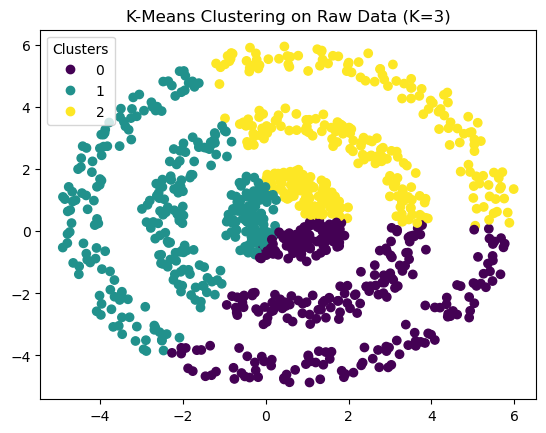

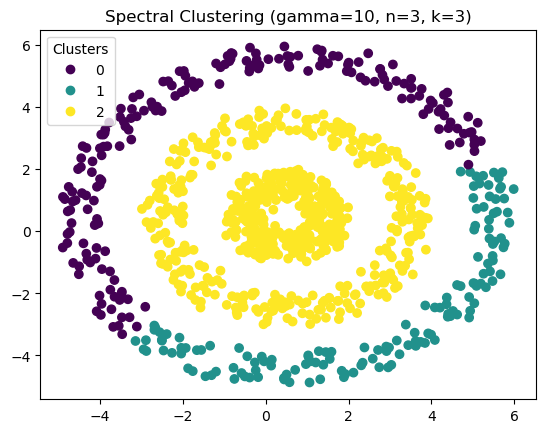

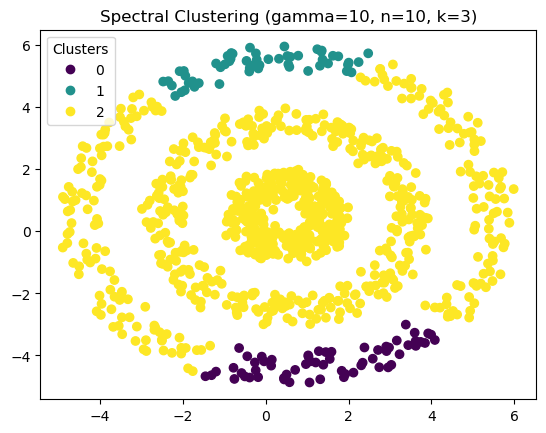

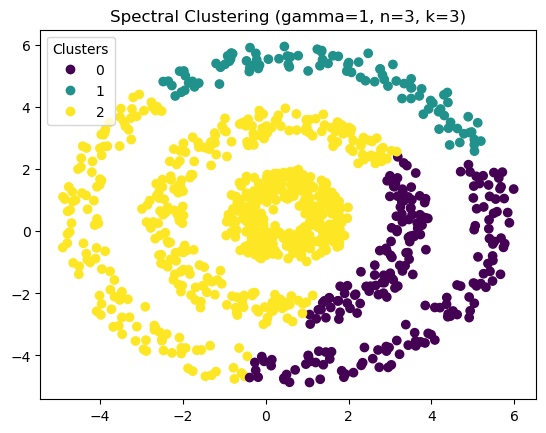

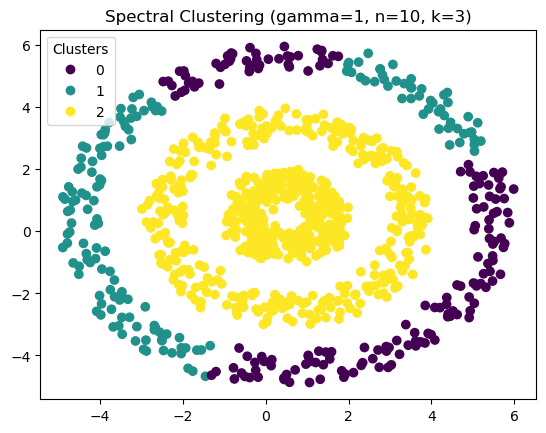

In [3]:
# Run k-means clustering on the raw data
kmeans = KMeans(K=3, max_iters=100)
labels_raw = kmeans.predict(data)


plot_clusters(data, labels_raw, "K-Means Clustering on Raw Data (K=3)")

# Perform spectral clustering with different parameters and plot the results

# Parameters: gamma=10, n=3, k=3
labels_spectral_1 = spectral_clustering(data, gamma=10, n=3, k=3)
plot_clusters(data, labels_spectral_1, "Spectral Clustering (gamma=10, n=3, k=3)")

# Parameters: gamma=10, n=10, k=3
labels_spectral_2 = spectral_clustering(data, gamma=10, n=10, k=3)
plot_clusters(data, labels_spectral_2, "Spectral Clustering (gamma=10, n=10, k=3)")

# Parameters: gamma=1, n=3, k=3
labels_spectral_3 = spectral_clustering(data, gamma=1, n=3, k=3)
plot_clusters(data, labels_spectral_3, "Spectral Clustering (gamma=1, n=3, k=3)")

# Parameters: gamma=1, n=10, k=3
labels_spectral_4 = spectral_clustering(data, gamma=1, n=10, k=3)
plot_clusters(data, labels_spectral_4, "Spectral Clustering (gamma=1, n=10, k=3)")



# Textwrite cell 

**K-Means on Raw Data:**

When applied directly to raw data, K-Means clustering tends to form clusters of arbitrary shapes, often poorly distributed, due to the nature of the data's distribution and variance.

**Spectral Clustering Followed by K-Means:**

- **(Gamma, n, k) = (10, 3, 3):** With a high gamma value, the adjacency matrix becomes highly sensitive to small distance differences, resulting in tighter clusters. This configuration produces three clusters, each forming concentric circles.
  
- **(Gamma, n, k) = (10, 10, 3):** Increasing the number of eigenvectors (n) allows for capturing more variance in the data. Consequently, this setup results in clusters of arbitrary shapes for two components, while the third component forms a correct cluster within the same orbit.

- **(Gamma, n, k) = (1, 3, 3):** A lower gamma value reduces the sensitivity of the adjacency matrix to distances, leading to more overlapping clusters.

- **(Gamma, n, k) = (1, 10, 3):** Even with a low gamma value, using more eigenvectors can enhance clustering effectiveness by capturing more data dimensions. However, this configuration tends to create one significantly larger cluster compared to the others.

# Q2: DB Scan

Cluster the dataset B using DBScan. You may use the inbuilt DBscan function in sklearn  Explore the eps and min_samples parameter. 

Give a scatterplot of the datapoints that are not labelled as outlier by DBScan. Color the data points based on cluster label. 

Use eps values (0.1, 0.3 and 1) and min_samples values (3,10,30) for a total of 9 plots. Summarise your conclusions in the textwrite cell.

In [ ]:
# Codewrite cell (Use as you wish)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


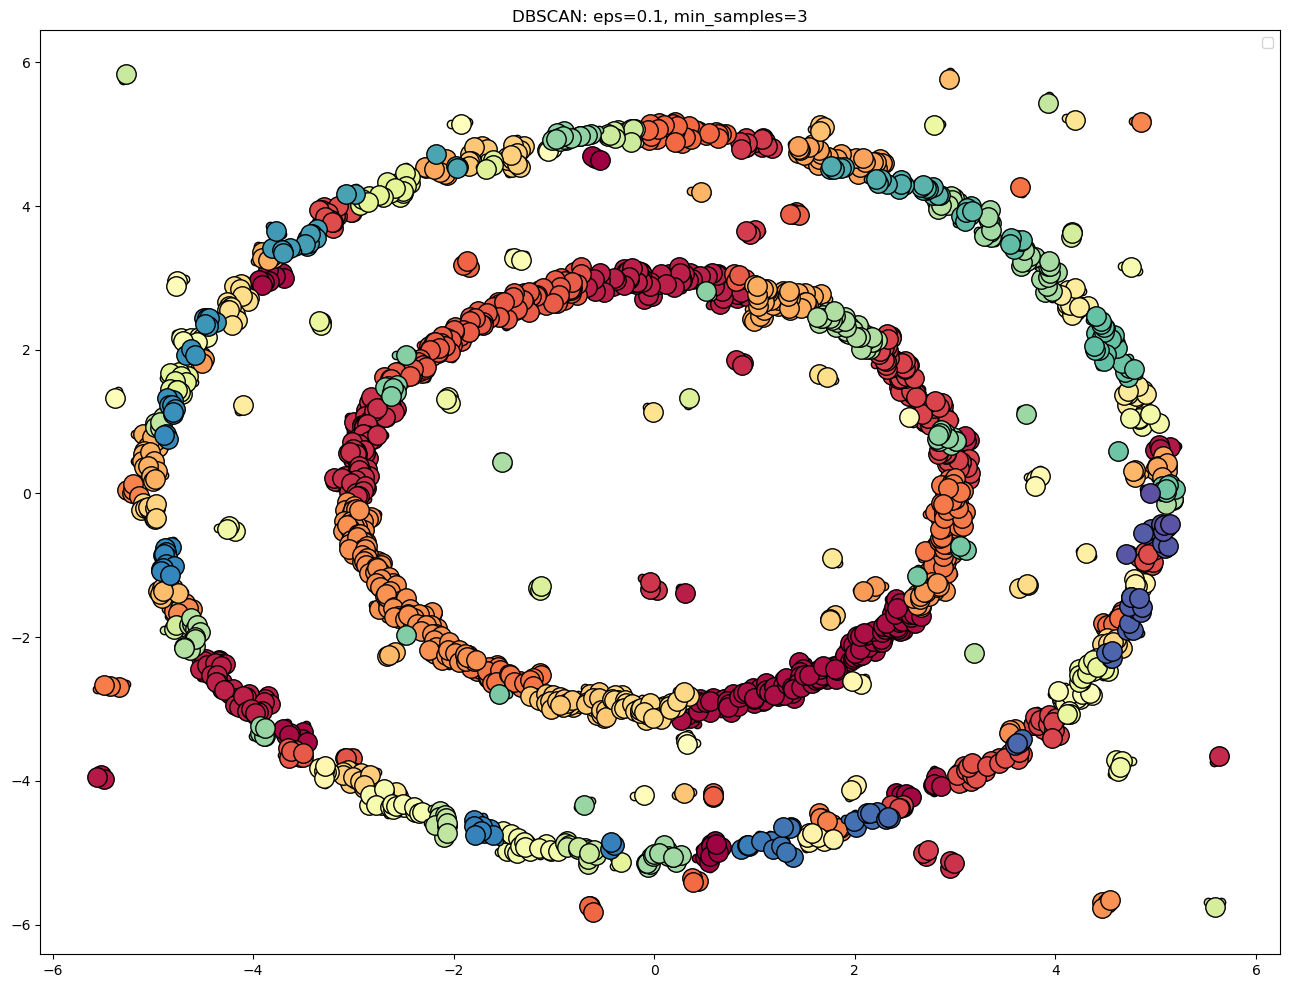

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


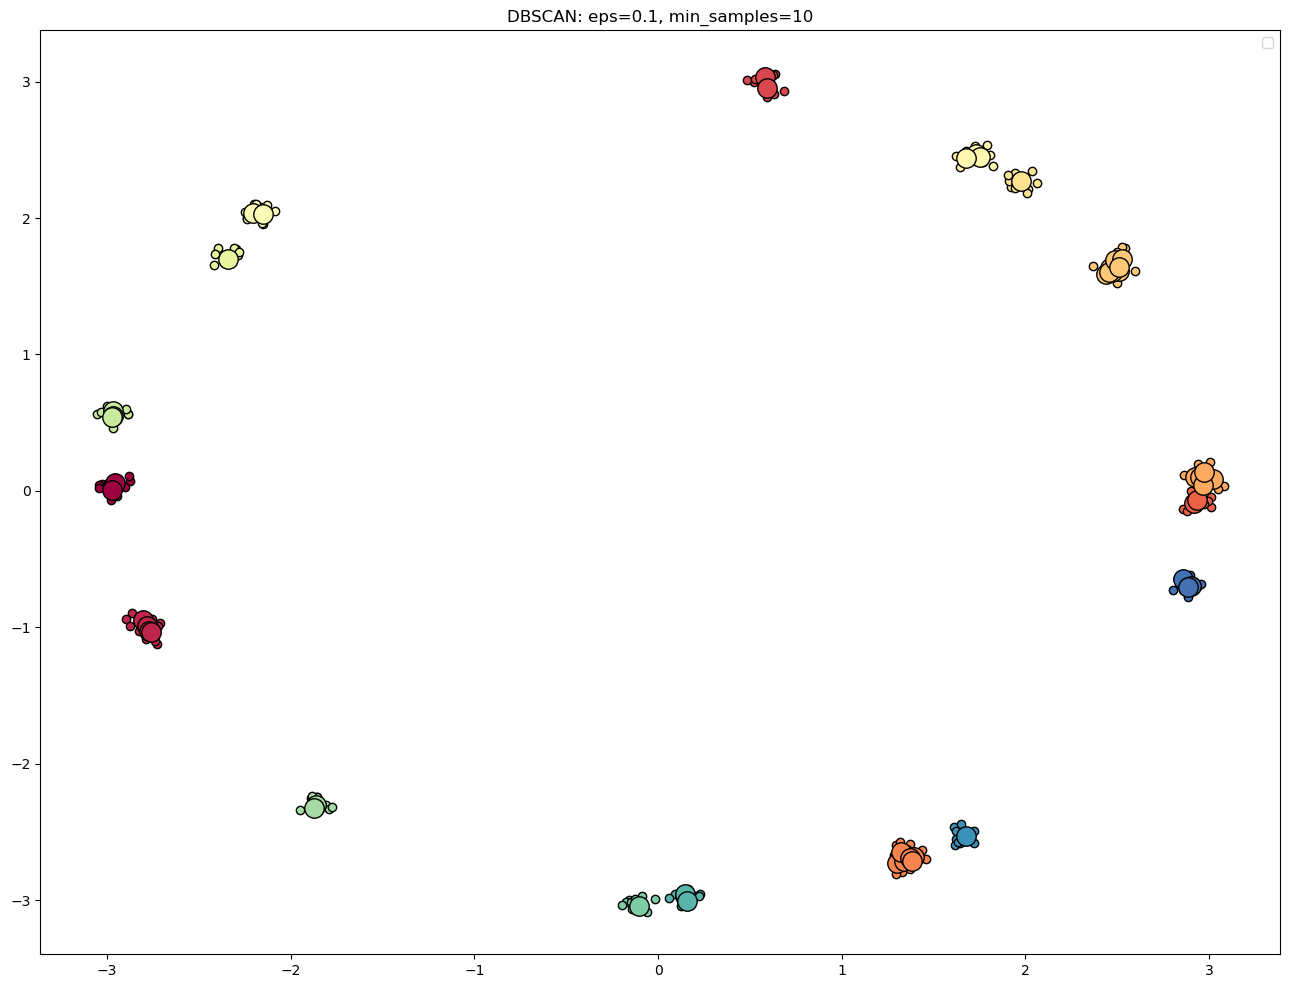

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


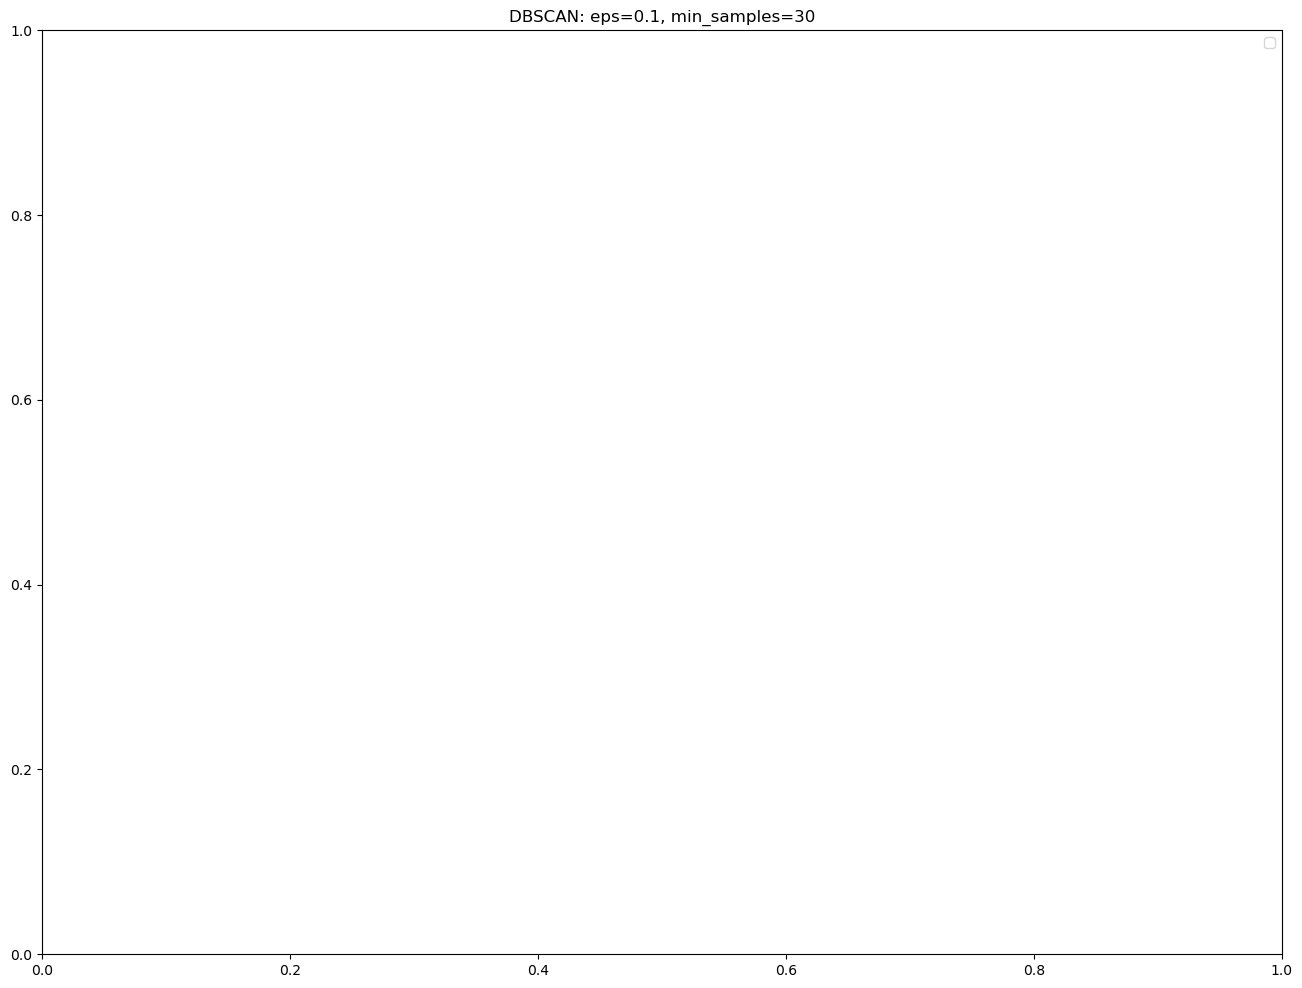

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


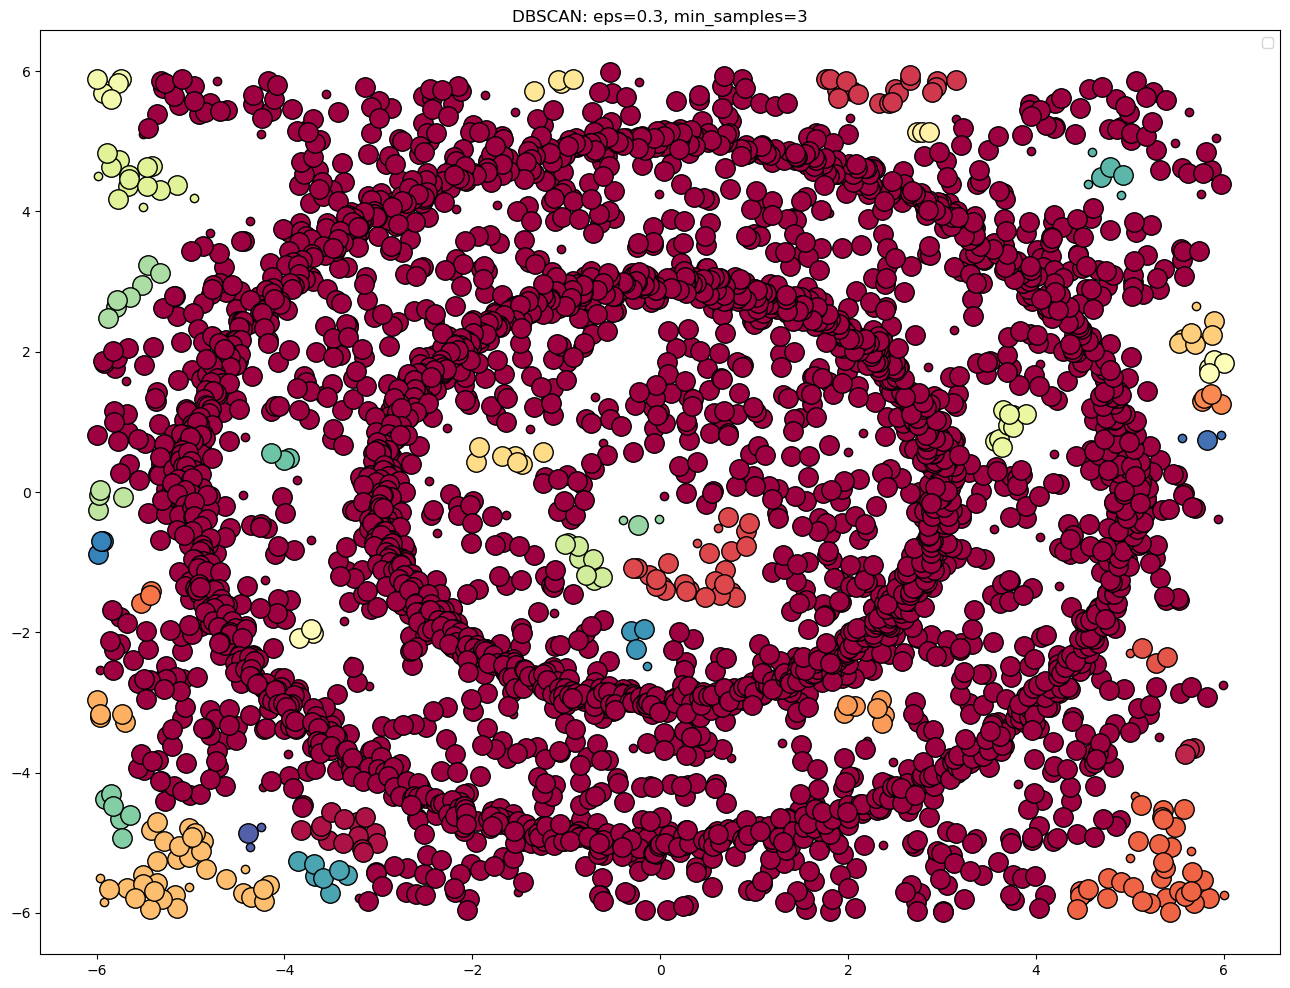

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


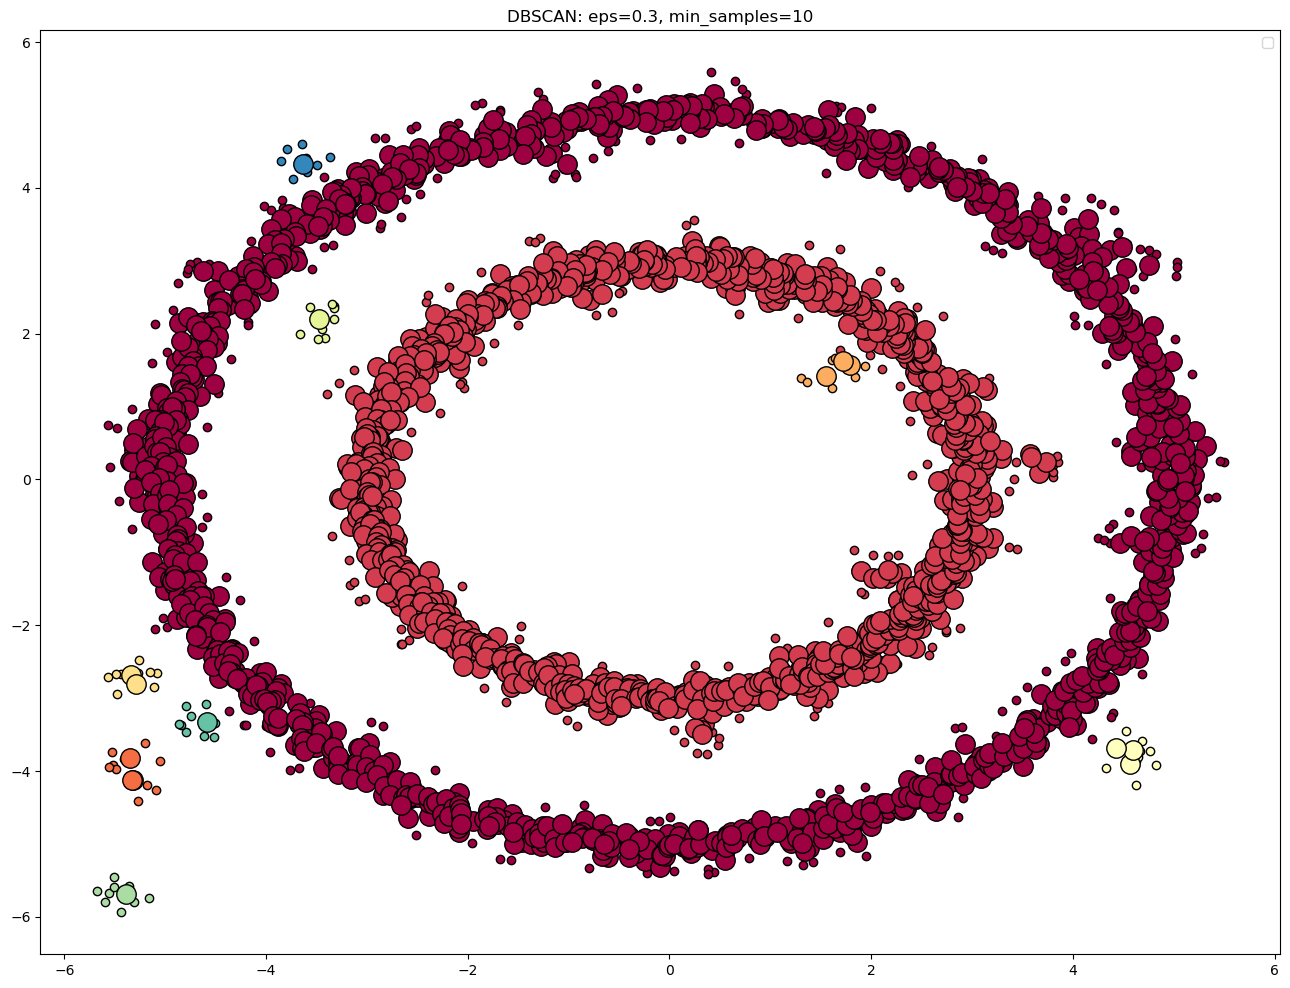

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


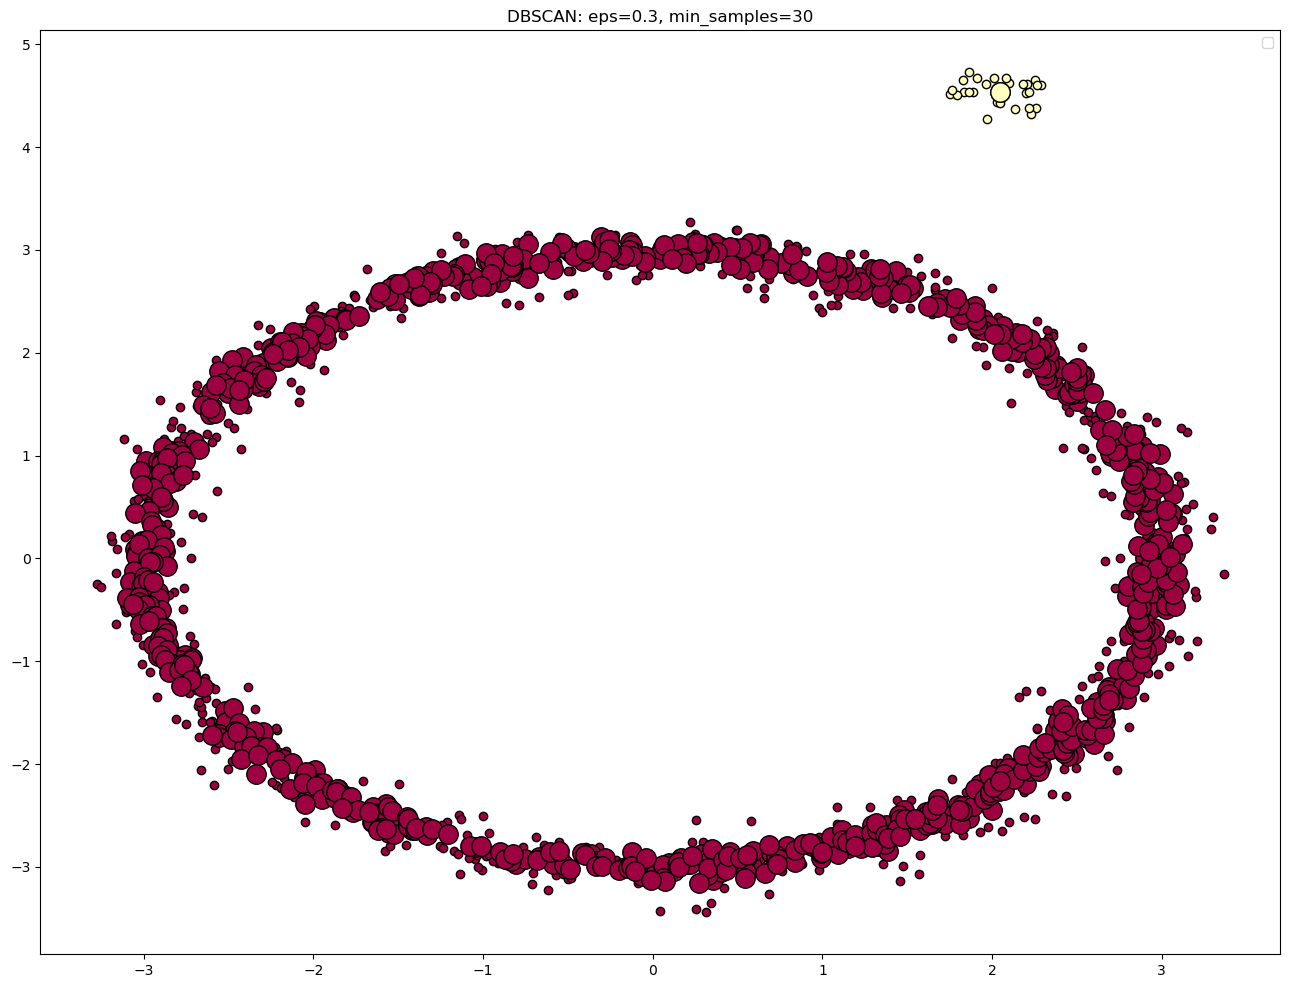

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


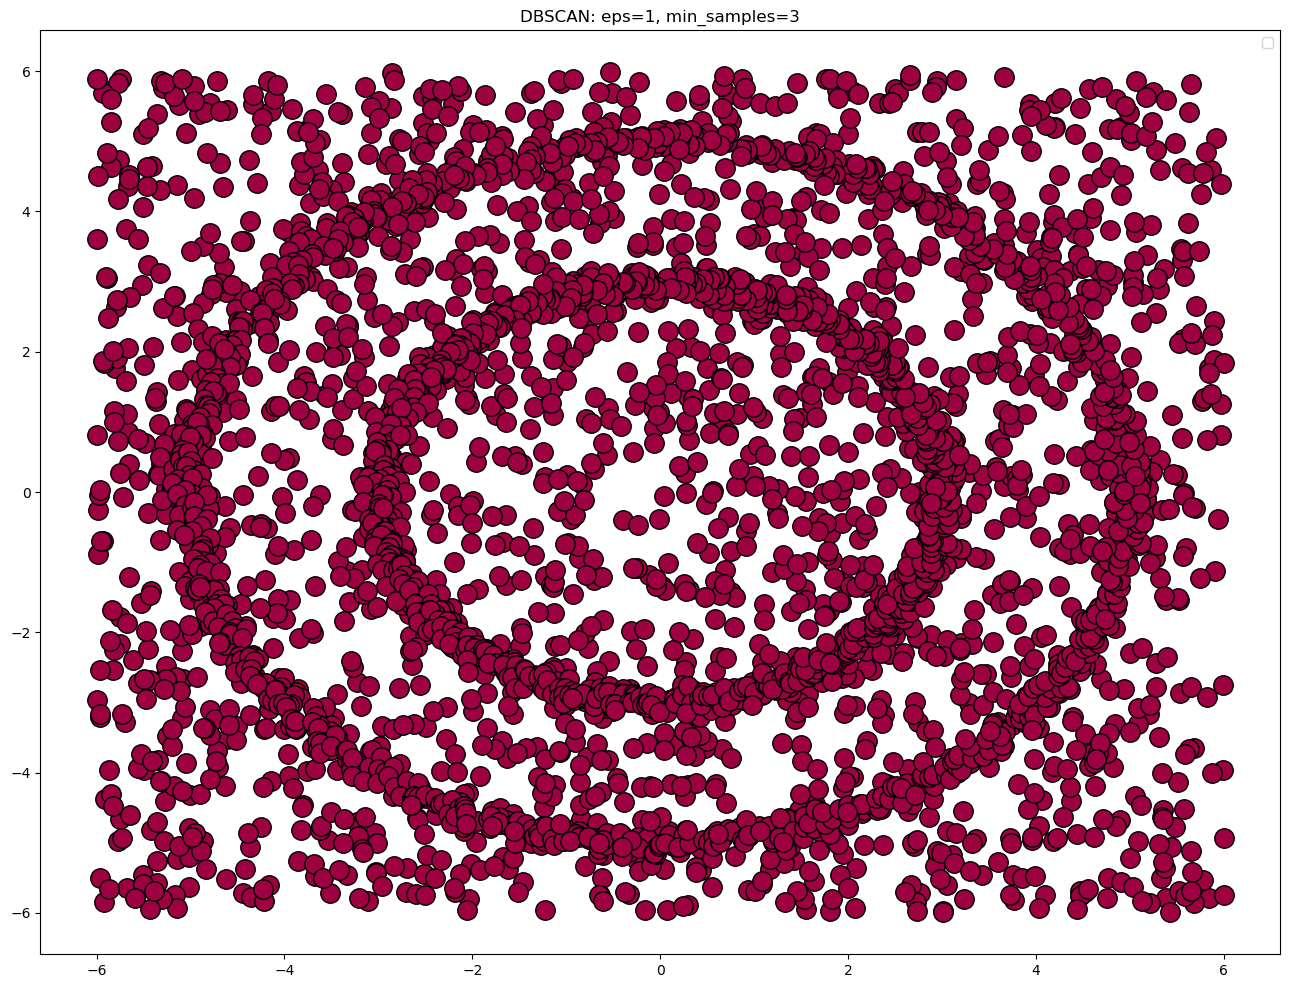

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


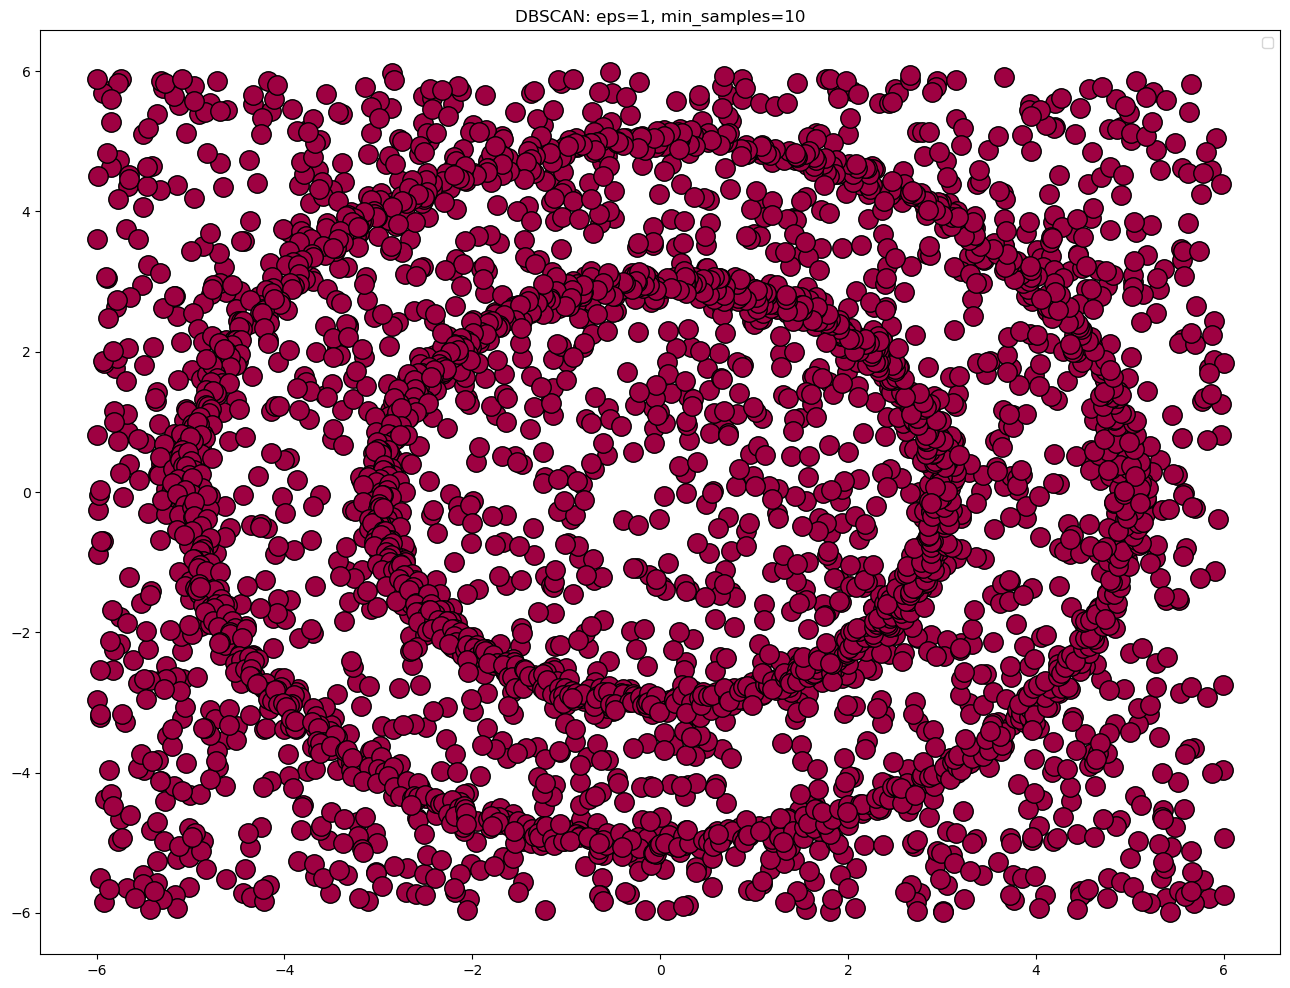

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


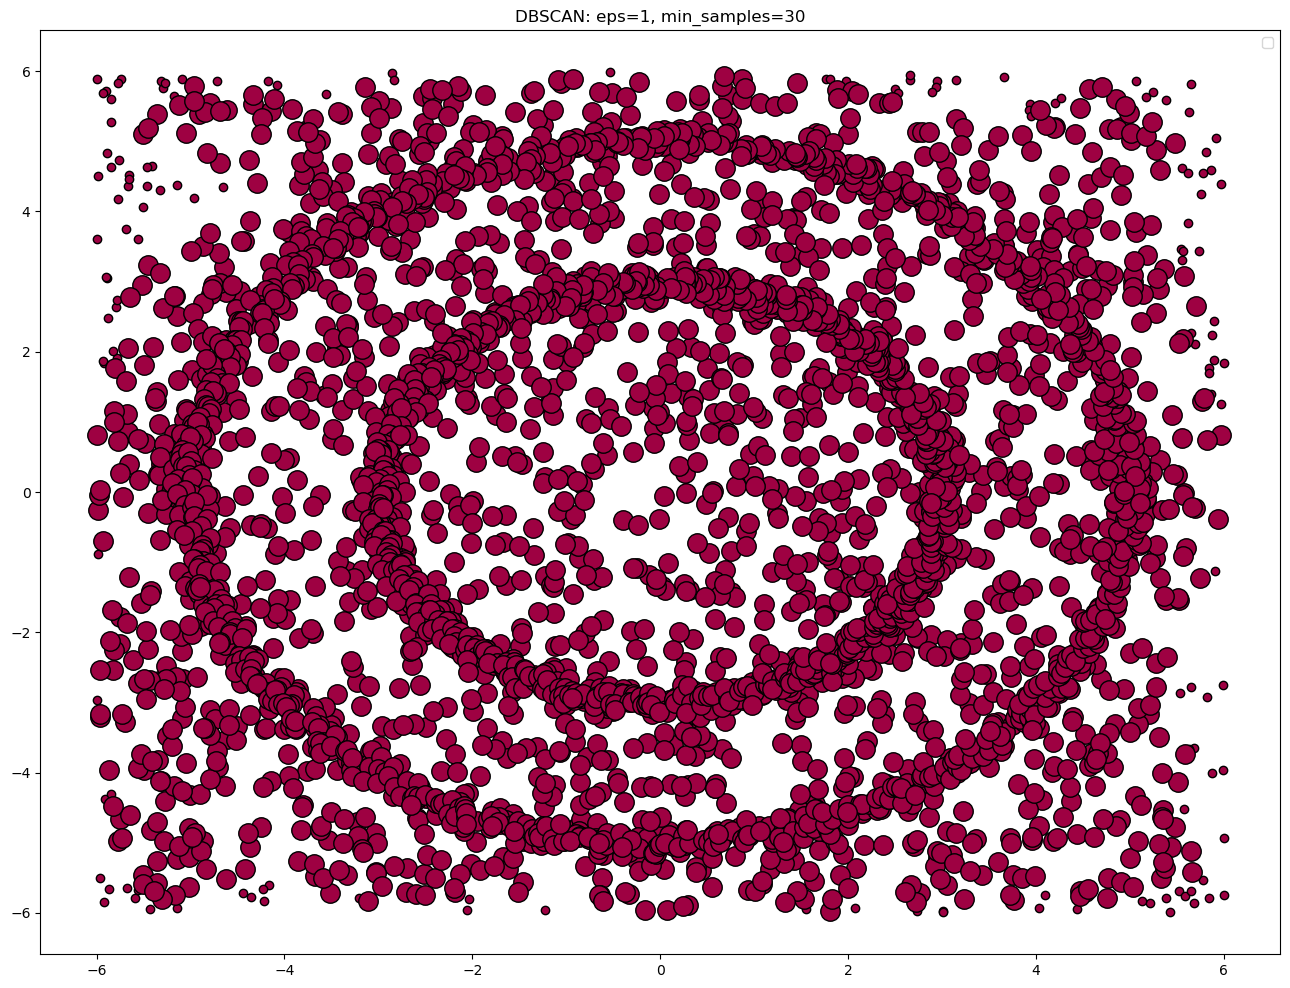

In [6]:
# Codewrite cell. Get the 9 plots here.import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define the parameter grids
eps_values = [0.1, 0.3, 1]
min_samples_values = [3, 10, 30]

dataset_path = 'Dataset_B.npy'
X = np.load(dataset_path)

# Function to perform DBScan clustering and plot results
def plot_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    if hasattr(dbscan, 'core_sample_indices_'):
        core_samples_mask[dbscan.core_sample_indices_] = True

    # Plotting
    plt.figure(figsize=(16, 12))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Skip the outliers
            continue

        class_member_mask = (labels == k)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

    plt.title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
    plt.legend(loc='best')
    plt.show()

# Run DBScan for each combination of eps and min_samples and plot the results
for eps in eps_values:
    for min_samples in min_samples_values:
        plot_dbscan(X, eps, min_samples)


# Textwrite cell

**DBSCAN Analysis:**

- For Eps=0.1 and Min_Samples=3, there are more unique labels compared to Min_Samples=10 or 30. When Eps=0.1 and Min_Samples=30, there are no unique labels that meet the condition, resulting in all points being classified as outliers. Consequently, the graph is empty since outliers are not plotted.

- For Eps=0.3 and Min_Samples=3 or 10, the number of unique labels is greater compared to when Min_Samples=30.

- For Eps=1 and Min_Samples=3, 10, or 30, the plots look similar because they all result in a single cluster that meets the conditions.

# Q3: PCA and k-Nearest Neighbours

Consider the Digits dataset that is a part of the sklearn library. It consists of 1797 64 dimensional vectors with each corresponding to an 8x8 image of a digit. The label also gives the digit id. It is a 10-class classification problem.

Choose a random subset of size 1500 for train and the rest for testing. Run k-Nearest neighbours with k values 1,3,7,15 and 31 and report the training and test accuracy. 

Repeat the above after performing PCA on the data. Use top n-principal components for n=2,4,8,16,32. For each n in the list report the best k-NN test accuracy and the k which achieves that accuracy and the approximation error for this particular value of n.

Repeat the above for a noisy version of the data. i.e. add a random Gaussian noise of mean zero and variance 1 to all the 1797*64 input numbers.

In total, the results should be given in 4 tables in the last textwrite cell:. Summarise your findings in a paragraph.

Table 1: Raw data , k-NN performance. One row for each k.

Table 2: n-component PCA preprocessed data k-NN performance. One row for each n.

Table 3: Raw noised data, k-NN performance. One row for each k.

Table 4: n-component PCA preprocessed noised data k-NN performance. One row for each n.

In [10]:
import numpy as np
from sklearn.datasets import load_digits

# Euclidean distance function
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

# Function to find the most common label
def most_common(labels):
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1
    
    sorted_label_counts = sorted(label_counts.items(), key=lambda item: item[1], reverse=True)
    
    return sorted_label_counts

# k-NN class implementation
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        find_most_common = most_common(k_nearest_labels)
        return find_most_common[0][0]

# PCA class implementation
class PCA:
    def __init__(self, no_dim):
        self.no_dim = no_dim
        self.best_k_EVs = None
        self.mean = None
        
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        
        indexes = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[indexes]
        
        eigenvectors = eigenvectors.T
        eigenvectors = eigenvectors[indexes]
        
        self.best_k_EVs = eigenvectors[:self.no_dim]
        
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.best_k_EVs.T)

# Load the digits dataset
digits = load_digits()

np.random.seed(42)

indices = np.random.permutation(len(digits.data))

train_size = 1500
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = digits.data[train_indices]
y_train = digits.target[train_indices]
X_test = digits.data[test_indices]
y_test = digits.target[test_indices]

k_values = [1, 3, 7, 15, 31]

def evaluate_knn(X_train, y_train, X_test, y_test, k_values):
    results = []
    for k in k_values:
        clf = KNN(k=k)
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_train)
        test_predictions = clf.predict(X_test)
        train_acc = np.sum(train_predictions == y_train) / len(y_train)
        test_acc = np.sum(test_predictions == y_test) / len(y_test)
        results.append((k, train_acc, test_acc))
    return results

raw_data_results = evaluate_knn(X_train, y_train, X_test, y_test, k_values)

n_components = [2, 4, 8, 16, 32]

def evaluate_pca_knn(X_train, y_train, X_test, y_test, n_components, k_values):
    pca_knn_results = []
    for n in n_components:
        pca = PCA(no_dim=n)
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        best_test_acc = 0
        best_k = None
        approximation_error = None
        
        for k in k_values:
            clf = KNN(k=k)
            clf.fit(X_train_pca, y_train)
            test_predictions = clf.predict(X_test_pca)
            test_acc = np.sum(test_predictions == y_test) / len(y_test)
            if test_acc > best_test_acc:
                best_test_acc = test_acc
                best_k = k
                
        # Calculate approximation error
        approximated_X_train = np.dot(X_train_pca, pca.best_k_EVs) + pca.mean
        approximation_error = np.mean(np.square(X_train - approximated_X_train))
        
        pca_knn_results.append((n, best_k, best_test_acc, approximation_error))
    return pca_knn_results

pca_data_results = evaluate_pca_knn(X_train, y_train, X_test, y_test, n_components, k_values)




In [11]:
# Codewrite cell (Do the experiments for filling Tables 1 and 2 here)
print("Table 1: Raw data, k-NN performance")
print("k\tTrain Accuracy\tTest Accuracy")
for result in raw_data_results:
    print(f"{result[0]}\t{result[1]:.4f}\t{result[2]:.4f}")

print("\nTable 2: n-component PCA preprocessed data k-NN performance")
print("n\tBest k\tTest Accuracy\tApproximation Error")
for result in pca_data_results:
    print(f"{result[0]}\t{result[1]}\t{result[2]:.4f}\t{result[3]:.4f}")

Table 1: Raw data, k-NN performance
k	Train Accuracy	Test Accuracy
1	1.0000	0.9832
3	0.9933	0.9865
7	0.9887	0.9832
15	0.9860	0.9798
31	0.9707	0.9596

Table 2: n-component PCA preprocessed data k-NN performance
n	Best k	Test Accuracy	Approximation Error
2	31	0.3401	5666257172.3112
4	31	0.6498	12621650733.9485
8	7	0.8114	44750056489.5927
16	7	0.9327	109782031026.2664
32	1	0.9394	358721493217.8965


In [12]:
# Codewrite cell (Do the experiments for filling Tables 3 and 4 here)
# Add Gaussian noise to the data
X_train_noisy = X_train + np.random.normal(0, 1, X_train.shape)
X_test_noisy = X_test + np.random.normal(0, 1, X_test.shape)

noisy_data_results = evaluate_knn(X_train_noisy, y_train, X_test_noisy, y_test, k_values)

noisy_pca_data_results = evaluate_pca_knn(X_train_noisy, y_train, X_test_noisy, y_test, n_components, k_values)


print("\nTable 3: Noisy raw data, k-NN performance")
print("k\tTrain Accuracy\tTest Accuracy")
for result in noisy_data_results:
    print(f"{result[0]}\t{result[1]:.4f}\t{result[2]:.4f}")

print("\nTable 4: Noisy n-component PCA preprocessed data k-NN performance")
print("n\tBest k\tTest Accuracy\tApproximation Error")
for result in noisy_pca_data_results:
    print(f"{result[0]}\t{result[1]}\t{result[2]:.4f}\t{result[3]:.4f}")


Table 3: Noisy raw data, k-NN performance
k	Train Accuracy	Test Accuracy
1	1.0000	0.9832
3	0.9933	0.9832
7	0.9900	0.9798
15	0.9847	0.9697
31	0.9720	0.9562

Table 4: Noisy n-component PCA preprocessed data k-NN performance
n	Best k	Test Accuracy	Approximation Error
2	15	0.2626	9019817277.8754
4	15	0.5286	22277105265.4235
8	15	0.7778	43356352988.9180
16	3	0.8956	139715482056.4800
32	1	0.9360	420894783480.4055


# Textwrite cell

The KNN classifier achieved excellent performance on the original dataset, reaching a peak test accuracy of 0.9865 with k=3.

When PCA was applied, performance improved due to reduced dimensionality, particularly with 16 and 32 components, maintaining high accuracy and better approximation.

Adding Gaussian noise to the data caused a slight decrease in accuracy, but KNN remained robust, still achieving a test accuracy of 0.9832 with k=3.

PCA also proved effective on the noisy data, with the best performance observed at 32 components. Overall, KNN combined with PCA effectively balances accuracy and dimensionality reduction, demonstrating reliable performance even in the presence of noise.

# Q4 : Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of compoents as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) thatis optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [3]:
# Code read
def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)


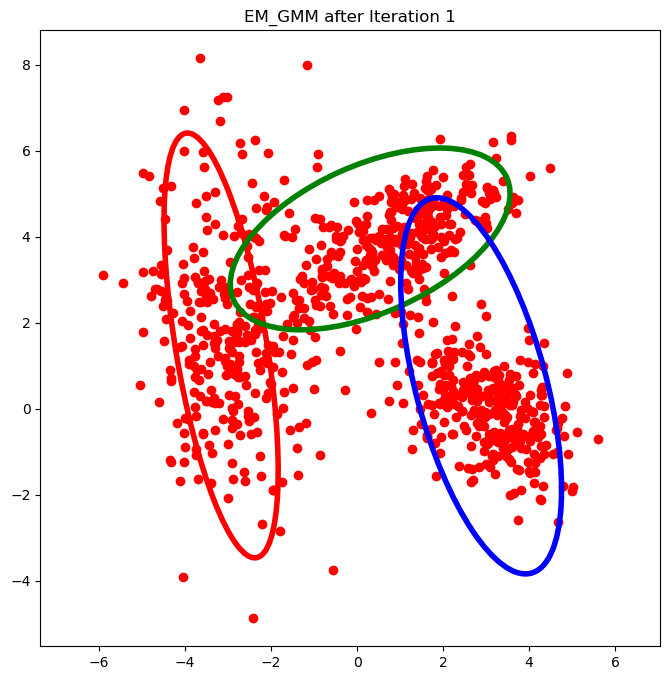

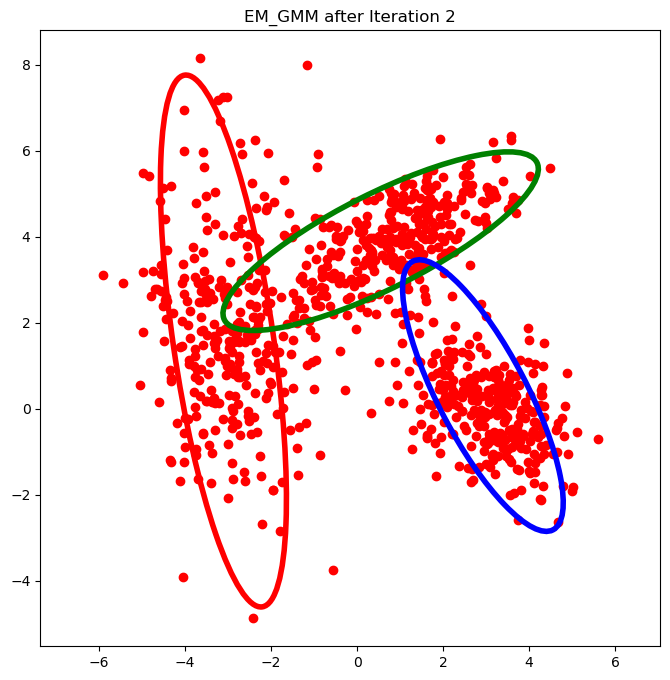

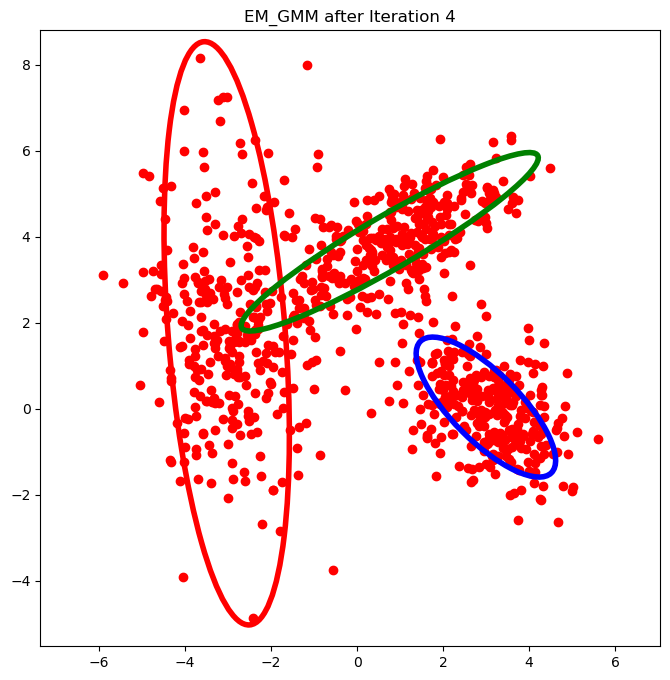

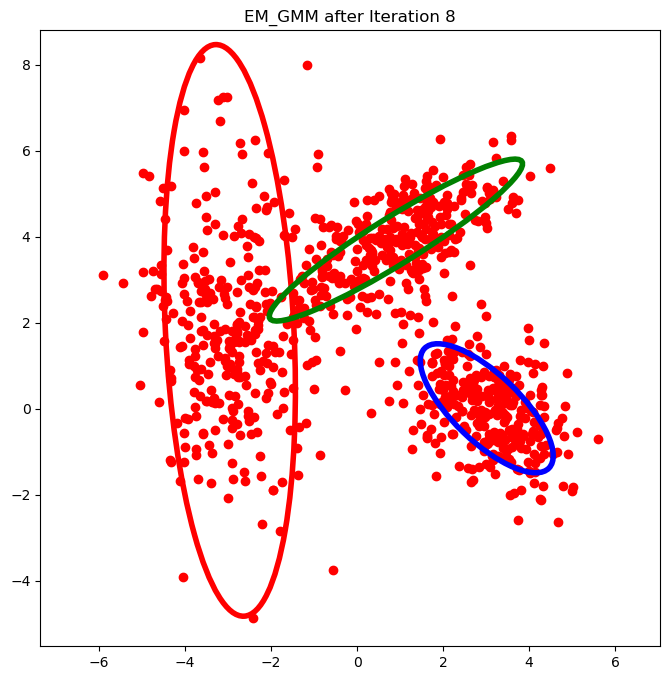

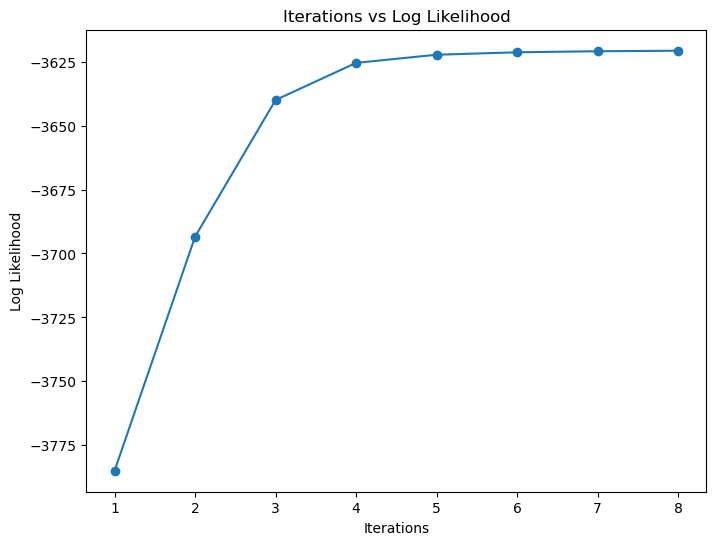

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_scatter(X, ax):
    colors = ['r', 'g', 'b', 'k']
    ax.axis('equal')
    for i, data in enumerate(X):
        ax.scatter(data[:, 0], data[:, 1], c=colors[i], marker='o')



def initialize(train_X, num_components):
    means = train_X[np.random.choice(train_X.shape[0], num_components, False)]
    covariances = np.array([np.eye(train_X.shape[1])] * num_components)
    weights = np.ones(num_components) / num_components
    return means, covariances, weights

def expectation_step(train_X, means, covariances, weights):
    responsibilities = np.zeros((len(train_X), len(means)))
    i = 0
    while i < len(train_X):
        j = 0
        while j < len(means):
            diff = train_X[i] - means[j]
            inv_cov = np.linalg.inv(covariances[j])
            exponent = -0.5 * np.dot(np.dot(diff, inv_cov), diff.T)
            numerator = weights[j] * np.exp(exponent)
            denominator = np.sqrt((2 * np.pi) ** len(train_X[0]) * np.linalg.det(covariances[j]))
            responsibilities[i, j] = numerator / denominator
            j += 1
        responsibilities[i] /= responsibilities[i].sum()
        i += 1
    return responsibilities

def maximization_step(train_X, responsibilities):
    means = np.dot(responsibilities.T, train_X) / responsibilities.sum(axis=0)[:, None]
    covariances = np.zeros((responsibilities.shape[1], train_X.shape[1], train_X.shape[1]))
    i = 0
    while i < responsibilities.shape[1]:
        diff = train_X - means[i]
        covariances[i] = np.dot((responsibilities[:, i][:, None] * diff).T, diff) / responsibilities[:, i].sum()
        i += 1
    weights = responsibilities.sum(axis=0) / len(train_X)
    return means, covariances, weights

def expectation_maximization(iterations, num_components, train_X, means, covariances, weights):
    log_likelihoods = []
    it = 0
    while it < iterations:
        responsibilities = expectation_step(train_X, means, covariances, weights)
        means, covariances, weights = maximization_step(train_X, responsibilities)

        # Compute log likelihood
        log_likelihood = 0
        i = 0
        while i < len(train_X):
            log_likelihood += np.log(np.sum([
                weights[j] * (np.exp(-0.5 * np.dot(np.dot(train_X[i] - means[j], np.linalg.inv(covariances[j])),
                                                  train_X[i] - means[j].T)) /
                             np.sqrt((2 * np.pi) ** len(train_X[0]) * np.linalg.det(covariances[j])))
                for j in range(num_components)
            ]))
            i += 1
        log_likelihoods.append(log_likelihood)
        it += 1

    return means, covariances, weights, log_likelihoods

def plot_likelihoods(log_likelihoods):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, marker='o')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Log Likelihood')
    ax.set_title('Iterations vs Log Likelihood')
    plt.show()

# Data loading and initialization
train_X = np.load("Dataset_C.npy")
num_components = 3
means, covariances, weights = initialize(train_X, num_components)

# EM algorithm iterations
iterations = [1, 2, 4, 8]
for it in iterations:
    mean, cov, wgt, log_likelihoods = expectation_maximization(it, num_components, train_X, means, covariances, weights)
    

    # Plotting the GMM with ellipses
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('equal')
    plot_scatter([train_X], ax)
    plot_ellipses_gmm(mean, cov, ax)
    ax.set_title(f'EM_GMM after Iteration {it}')
    
    if it == 8:
        plot_likelihoods(log_likelihoods)
